## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

Import all packages to be used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Open dataframes

In [3]:
grossdf = pd.read_csv('../../zippedData/bom.movie_gross.csv.gz')
#grossdf.head(5)

In [4]:
ratingdf = pd.read_csv('../../zippedData/rt.movie_info.tsv.gz', sep='\t')
#ratingdf.head(5)

In [5]:
reviewdf = pd.read_csv('../../zippedData/rt.reviews.tsv.gz', sep='\t', encoding='iso-8859-1')
#reviewdf.head(5)

In [6]:
tmdbmoviesdf = pd.read_csv('../../zippedData/tmdb.movies.csv.gz')
#tmdbmoviesdf.head(5)

In [ ]:
#ratingdf['id'].unique

In [7]:
budgetdf = pd.read_csv('../../zippedData/tn.movie_budgets.csv.gz')
budgetdf.head(5)
#budgetdf.info()

#budgetdf['id'].unique

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
#ratingdf.info()

Merge Ratings and Budget Dataframes on ID, drop duplicates of ID

In [9]:
merged_df = pd.merge(ratingdf, budgetdf, on='id')
merged_df.drop_duplicates(subset='id', inplace=True)
merged_df.head(25)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
58,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
116,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
174,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
232,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
290,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
348,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"
406,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,"Jul 2, 2013",The Lone Ranger,"$275,000,000","$89,302,115","$260,002,115"
464,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN,"Mar 9, 2012",John Carter,"$275,000,000","$73,058,679","$282,778,100"
522,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN,"Nov 24, 2010",Tangled,"$260,000,000","$200,821,936","$586,477,240"


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 4625
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 81 non-null     int64 
 1   synopsis           78 non-null     object
 2   rating             80 non-null     object
 3   genre              80 non-null     object
 4   director           67 non-null     object
 5   writer             59 non-null     object
 6   theater_date       57 non-null     object
 7   dvd_date           57 non-null     object
 8   currency           19 non-null     object
 9   box_office         19 non-null     object
 10  runtime            78 non-null     object
 11  studio             27 non-null     object
 12  release_date       81 non-null     object
 13  movie              81 non-null     object
 14  production_budget  81 non-null     object
 15  domestic_gross     81 non-null     object
 16  worldwide_gross    81 non-null     int64 
dt

In [17]:
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype("int64")

In [11]:
groupeddf = merged_df.groupby('genre')['worldwide_gross'].mean()

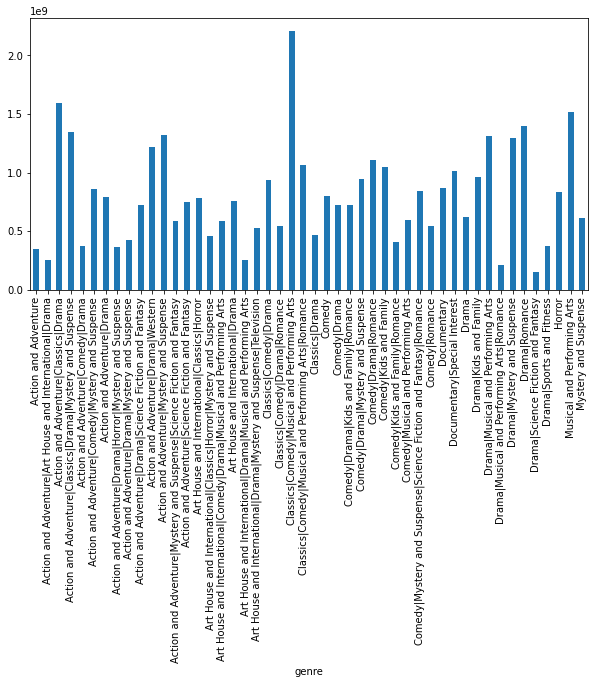

In [12]:
plt.figure(figsize=(10,5))
groupeddf.plot(kind='bar')
plt.show()

In [13]:
top_3 = groupeddf.nlargest(3)
top_3

genre
Classics|Comedy|Musical and Performing Arts    2.208208e+09
Action and Adventure|Classics|Drama            1.593674e+09
Musical and Performing Arts                    1.517936e+09
Name: worldwide_gross, dtype: float64

In [23]:
merged_df.dropna(subset=['runtime'], inplace=True)
merged_df['runtime'] = merged_df['runtime'].str.replace(' minutes', '').astype('int64')

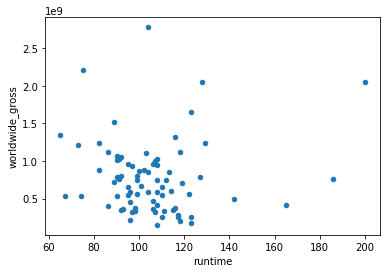

In [24]:
merged_df.plot(kind='scatter', x='runtime', y='worldwide_gross')
plt.show()

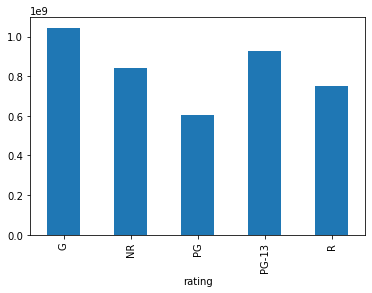

In [25]:
grouped_df1 = merged_df.groupby('rating')['worldwide_gross'].mean()

grouped_df1.plot(kind='bar')
plt.show()

In [26]:
merged_df['production_budget'] = merged_df['production_budget'].replace('[\$,]', '', regex=True).astype("int64")

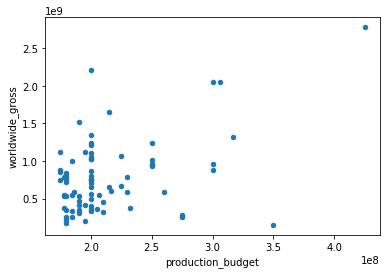

In [27]:
merged_df.plot(kind='scatter', x='production_budget', y='worldwide_gross')
plt.show()

In [32]:
import sqlite3

In [33]:
conn = sqlite3.connect('../../zippedData/im.db')

In [34]:
df = pd.read_sql_query("SELECT * FROM movie_basics", conn)

df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [35]:
df.rename(columns={'original_title':'movie'}, inplace=True)

KeyError: 'original_title'

In [36]:
merged2 = pd.merge(df, budgetdf, on='movie')

In [37]:
merged2

,movie_id,primary_title,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995","$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,The Overnight,The Overnight,2010,88.0,None,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...
3532,tt9607270,The Blue Bird,The Blue Bird,2015,84.0,Drama,71,"Jan 1, 1976","$1,200,000","$887,000","$887,000"
3533,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008","$2,500,000","$174,255","$174,255"
3534,tt9729206,Diner,Diner,2019,NaN,Crime,11,"Apr 2, 1982","$5,000,000","$12,592,907","$12,592,907"
3535,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008","$22,000,000","$23,530,831","$27,882,226"


In [38]:
merged2['production_budget'] = merged2['production_budget'].replace('[\$,]', '', regex=True).astype("int64")

In [39]:
merged2['worldwide_gross'] = merged2['worldwide_gross'].replace('[\$,]', '', regex=True).astype("int64")

In [40]:
merged2.head()

,movie_id,primary_title,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,$0,73706
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,"$70,433,227",122133227
2,tt0326592,The Overnight,The Overnight,2010,88.0,None,21,"Jun 19, 2015",200000,"$1,109,808",1165996
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",200000,"$1,109,808",1165996
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,"$720,828",9313302


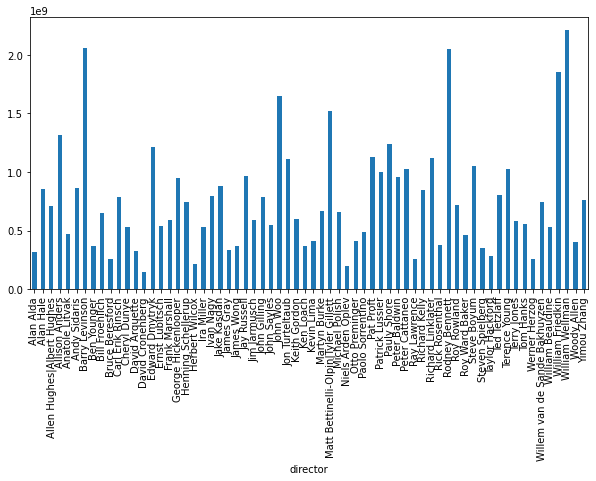

In [59]:
grouped_df2 = merged_df.groupby('director')['worldwide_gross'].mean()

plt.figure(figsize=(10,5))
grouped_df2.plot(kind='bar')
plt.show()

In [42]:
ttop_3 = grouped_df2.nlargest(10)
ttop_3

director
William Wellman                        2208208395
Barry Levinson                         2053311220
Rodney Bennett                         2048134200
William Friedkin                       1855779523
John Woo                               1648854864
Matt Bettinelli-Olpin|Tyler Gillett    1518722794
Allison Anders                         1316721747
Pauly Shore                            1242520711
Edward Dmytryk                         1215392272
Pat Proft                              1123790543
Name: worldwide_gross, dtype: int64

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 4625
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 78 non-null     int64 
 1   synopsis           77 non-null     object
 2   rating             78 non-null     object
 3   genre              78 non-null     object
 4   director           67 non-null     object
 5   writer             58 non-null     object
 6   theater_date       57 non-null     object
 7   dvd_date           57 non-null     object
 8   currency           19 non-null     object
 9   box_office         19 non-null     object
 10  runtime            78 non-null     int64 
 11  studio             26 non-null     object
 12  release_date       78 non-null     object
 13  movie              78 non-null     object
 14  production_budget  78 non-null     int64 
 15  domestic_gross     78 non-null     object
 16  worldwide_gross    78 non-null     int64 
dt

In [44]:
merged_df['profit'] = merged_df['worldwide_gross'] - merged_df['production_budget']

In [45]:
merged_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104,NaN,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2351345279
58,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108,Entertainment One,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-200237650
116,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116,NaN,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747
174,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128,NaN,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220,1747311220
232,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200,NaN,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,1748134200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,95,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116,Open Road Films,"Jun 6, 2014",Edge of Tomorrow,178000000,"$100,206,256",370541256,192541256
4454,96,A gang of suburban slackers spend an evening h...,R,Comedy|Drama,Richard Linklater,Eric Bogosian,NaN,NaN,NaN,NaN,118,NaN,"Mar 8, 2019",Captain Marvel,175000000,"$426,525,952",1123061550,948061550
4511,98,This video features the story of a mother tell...,NR,Comedy|Drama,Alan Hale,Beulah Marie Dix,NaN,NaN,NaN,NaN,104,NaN,"Jun 19, 2015",Inside Out,175000000,"$356,461,711",854235992,679235992
4568,99,A woman finds herself attempting to foil one o...,PG-13,Comedy|Romance,NaN,NaN,"Dec 20, 2002","Apr 29, 2003",$,"93,300,000",102,Warner Bros.,"Jul 7, 2017",Spider-Man: Homecoming,175000000,"$334,201,140",880166350,705166350


In [46]:
grouped_df3 = merged_df.groupby('director')['profit'].mean()

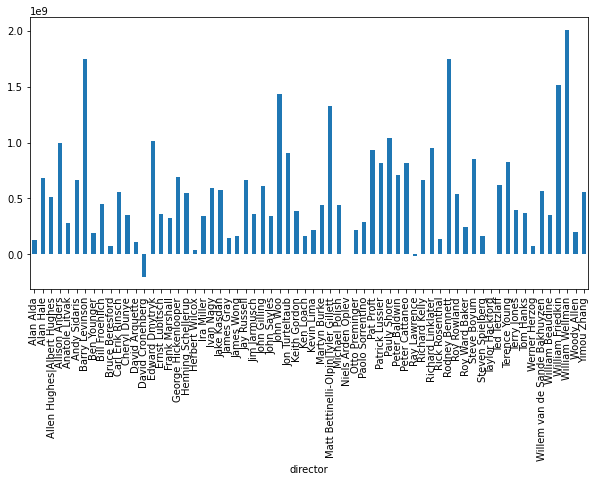

In [47]:
plt.figure(figsize=(10,5))
grouped_df3.plot(kind='bar')
plt.show()

Top 10 Directors by profit

In [52]:
director_profit = grouped_df3.nlargest(10)
director_profit

director
William Wellman                        2008208395
Rodney Bennett                         1748134200
Barry Levinson                         1747311220
William Friedkin                       1518279523
John Woo                               1433854864
Matt Bettinelli-Olpin|Tyler Gillett    1328722794
Pauly Shore                            1042520711
Edward Dmytryk                         1015392272
Allison Anders                          999721747
Richard Linklater                       948061550
Name: profit, dtype: int64

In [55]:
test1 = merged_df[merged_df['director'] == 'William Wellman']
test1

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
1798,43,Based on the play,NR,Classics|Comedy|Musical and Performing Arts,William Wellman,Nunnally Johnson,NaN,NaN,NaN,NaN,75,NaN,"Dec 19, 1997",Titanic,200000000,"$659,363,944",2208208395,2008208395


In [56]:
test2 = merged_df[merged_df['director'] == 'Rodney Bennett']
test2

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
232,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200,NaN,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,1748134200


In [57]:
test3 = merged_df[merged_df['director'] == 'Barry Levinson']
test3

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
174,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128,NaN,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220,1747311220


In [ ]:
### End of Part

Group the profits by genre of movie and graph

In [48]:
grouped_df4 = merged_df.groupby('genre')['profit'].mean()

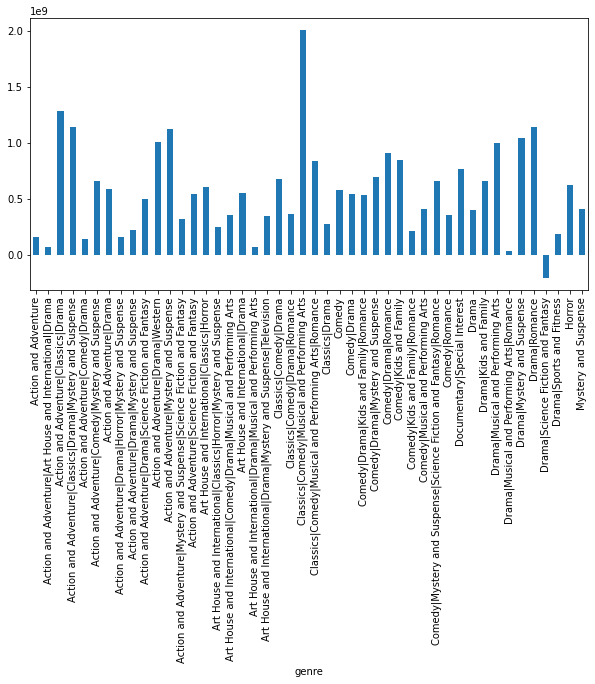

In [49]:
plt.figure(figsize=(10,5))
grouped_df4.plot(kind='bar')
plt.show()

In [50]:
tttop_3 = grouped_df4.nlargest(10)
tttop_3

genre
Classics|Comedy|Musical and Performing Arts                 2.008208e+09
Action and Adventure|Classics|Drama                         1.286174e+09
Action and Adventure|Classics|Drama|Mystery and Suspense    1.148258e+09
Drama|Romance                                               1.145861e+09
Action and Adventure|Mystery and Suspense                   1.125426e+09
Drama|Mystery and Suspense                                  1.049910e+09
Action and Adventure|Drama|Western                          1.015392e+09
Drama|Musical and Performing Arts                           9.997217e+08
Comedy|Drama|Romance                                        9.105270e+08
Comedy|Kids and Family                                      8.491029e+08
Name: profit, dtype: float64

In [63]:
# Hypothesis testing
from scipy.stats import ttest_ind

In [84]:
# Define the two samples
action_movies = merged2[merged2['genres'] == 'Classics|Comedy|Musical and Performing Arts']['worldwide_gross']
all_movies = merged2['worldwide_gross']

# Perform the hypothesis test
t_statistic, p_value = ttest_ind(action_movies, all_movies)

print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: nan
p-value: nan


In [72]:
print(action_movies)

Series([], Name: worldwide_gross, dtype: int64)


In [66]:
all_movies

0           73706
1       122133227
2         1165996
3         1165996
4         9313302
          ...    
3532       887000
3533       174255
3534     12592907
3535     27882226
3536            0
Name: worldwide_gross, Length: 3537, dtype: int64

In [78]:
merged2['worldwide_gross'].max()

2208208395

In [81]:
merged2[merged2['worldwide_gross'] == merged2['worldwide_gross'].max()]

,movie_id,primary_title,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
2516,tt2495766,Titanic,Titanic,2012,NaN,Adventure,43,"Dec 19, 1997",200000000,"$659,363,944",2208208395
2517,tt8852130,Titanic,Titanic,2018,115.0,Family,43,"Dec 19, 1997",200000000,"$659,363,944",2208208395


In [80]:
row

2208208395